# PySpark

PySpark — это API Apache Spark, который представляет собой систему с открытым исходным кодом, применяемую для распределенной обработки больших данных.

Устанавливаем пакет openjdk-8-jdk-headless.

Не показываем пользователю запросы на подтверждение или ввод пароля.

Не выводим информационные сообщения о процессе установки.

Все вывод команды направляется в /dev/null, где его не читает ни один процесс.


In [81]:
import chardet

# Определение кодировки вывода apt-get
output = !apt-get update
detected_encoding = chardet.detect(output[0].encode()).get('encoding')
print(f"Детектированная кодировка: {detected_encoding}")

Детектированная кодировка: ascii


In [82]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

/bin/bash: warning: setlocale: LC_ALL: cannot change locale (ru_RU.UTF-8)


In [16]:
!wget -q http://archive.apache.org/dist/spark/spark-3.5.1/spark-3.5.1-bin-hadoop3.tgz
!tar xf spark-3.5.1-bin-hadoop3.tgz
!pip install -q findspark

/bin/bash: warning: setlocale: LC_ALL: cannot change locale (ru_RU.UTF-8)
/bin/bash: warning: setlocale: LC_ALL: cannot change locale (ru_RU.UTF-8)
/bin/bash: warning: setlocale: LC_ALL: cannot change locale (ru_RU.UTF-8)
/bin/bash: warning: setlocale: LC_ALL: cannot change locale (ru_RU.UTF-8)


In [83]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64" # ссылка до java
os.environ["SPARK_HOME"] = "/content/spark-3.5.1-bin-hadoop3" # ссылка до spark

In [84]:
!ls

/bin/bash: warning: setlocale: LC_ALL: cannot change locale (ru_RU.UTF-8)
cars.csv    sample_data		     spark-3.5.1-bin-hadoop3.tgz
cars.csv.1  spark-3.5.1-bin-hadoop3  spark-3.5.1-bin-hadoop3.tgz.1


In [86]:
import findspark
findspark.init()

from pyspark.sql import SparkSession # вызывается созданная сессия

In [88]:
spark = SparkSession.builder.master("local[*]").getOrCreate()
spark.conf.set("spark.sql.repl.eagerEval.enabled", True) # Форматирование таблиц SQL
spark

In [21]:
# Downloading and preprocessing Cars Data downloaded origianlly from https://perso.telecom-paristech.fr/eagan/class/igr204/datasets
!wget https://jacobceles.github.io/knowledge_repo/colab_and_pyspark/cars.csv

/bin/bash: warning: setlocale: LC_ALL: cannot change locale (ru_RU.UTF-8)
--2024-12-23 15:25:18--  https://jacobceles.github.io/knowledge_repo/colab_and_pyspark/cars.csv
Resolving jacobceles.github.io (jacobceles.github.io)... 185.199.108.153, 185.199.109.153, 185.199.110.153, ...
Connecting to jacobceles.github.io (jacobceles.github.io)|185.199.108.153|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://jacobcelestine.com/knowledge_repo/colab_and_pyspark/cars.csv [following]
--2024-12-23 15:25:19--  https://jacobcelestine.com/knowledge_repo/colab_and_pyspark/cars.csv
Resolving jacobcelestine.com (jacobcelestine.com)... 185.199.108.153, 185.199.109.153, 185.199.110.153, ...
Connecting to jacobcelestine.com (jacobcelestine.com)|185.199.108.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 22608 (22K) [text/csv]
Saving to: 'cars.csv.1'

cars.csv.1          100%[===================>]  22.08K  --.-KB/s    in 0.001s 

In [22]:
!ls

/bin/bash: warning: setlocale: LC_ALL: cannot change locale (ru_RU.UTF-8)
cars.csv    sample_data		     spark-3.5.1-bin-hadoop3.tgz
cars.csv.1  spark-3.5.1-bin-hadoop3  spark-3.5.1-bin-hadoop3.tgz.1


In [89]:
# Load data from csv to a dataframe.
# header=True means the first row is a header
# sep=';' means the column are seperated using ''
df = spark.read.csv('cars.csv', header=True, sep=";") # по умолчанию все данные - строки
df.show() # SQL SELECT TOP 20

+--------------------+----+---------+------------+----------+------+------------+-----+------+
|                 Car| MPG|Cylinders|Displacement|Horsepower|Weight|Acceleration|Model|Origin|
+--------------------+----+---------+------------+----------+------+------------+-----+------+
|Chevrolet Chevell...|18.0|        8|       307.0|     130.0| 3504.|        12.0|   70|    US|
|   Buick Skylark 320|15.0|        8|       350.0|     165.0| 3693.|        11.5|   70|    US|
|  Plymouth Satellite|18.0|        8|       318.0|     150.0| 3436.|        11.0|   70|    US|
|       AMC Rebel SST|16.0|        8|       304.0|     150.0| 3433.|        12.0|   70|    US|
|         Ford Torino|17.0|        8|       302.0|     140.0| 3449.|        10.5|   70|    US|
|    Ford Galaxie 500|15.0|        8|       429.0|     198.0| 4341.|        10.0|   70|    US|
|    Chevrolet Impala|14.0|        8|       454.0|     220.0| 4354.|         9.0|   70|    US|
|   Plymouth Fury iii|14.0|        8|       440.0|

In [90]:
df.show(5, truncate=False) # SQL SELECT TOP 5 без обрезки

+-------------------------+----+---------+------------+----------+------+------------+-----+------+
|Car                      |MPG |Cylinders|Displacement|Horsepower|Weight|Acceleration|Model|Origin|
+-------------------------+----+---------+------------+----------+------+------------+-----+------+
|Chevrolet Chevelle Malibu|18.0|8        |307.0       |130.0     |3504. |12.0        |70   |US    |
|Buick Skylark 320        |15.0|8        |350.0       |165.0     |3693. |11.5        |70   |US    |
|Plymouth Satellite       |18.0|8        |318.0       |150.0     |3436. |11.0        |70   |US    |
|AMC Rebel SST            |16.0|8        |304.0       |150.0     |3433. |12.0        |70   |US    |
|Ford Torino              |17.0|8        |302.0       |140.0     |3449. |10.5        |70   |US    |
+-------------------------+----+---------+------------+----------+------+------------+-----+------+
only showing top 5 rows



In [91]:
df.limit(5) # SQL-запросу LIMIT 5

Car,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model,Origin
Chevrolet Chevell...,18.0,8,307.0,130.0,3504.,12.0,70,US
Buick Skylark 320,15.0,8,350.0,165.0,3693.,11.5,70,US
Plymouth Satellite,18.0,8,318.0,150.0,3436.,11.0,70,US
AMC Rebel SST,16.0,8,304.0,150.0,3433.,12.0,70,US
Ford Torino,17.0,8,302.0,140.0,3449.,10.5,70,US


In [92]:
df.columns

['Car',
 'MPG',
 'Cylinders',
 'Displacement',
 'Horsepower',
 'Weight',
 'Acceleration',
 'Model',
 'Origin']

In [93]:
df.dtypes

[('Car', 'string'),
 ('MPG', 'string'),
 ('Cylinders', 'string'),
 ('Displacement', 'string'),
 ('Horsepower', 'string'),
 ('Weight', 'string'),
 ('Acceleration', 'string'),
 ('Model', 'string'),
 ('Origin', 'string')]

In [28]:
df.printSchema() # для вывода структуры (схемы) DataFrame

root
 |-- Car: string (nullable = true)
 |-- MPG: string (nullable = true)
 |-- Cylinders: string (nullable = true)
 |-- Displacement: string (nullable = true)
 |-- Horsepower: string (nullable = true)
 |-- Weight: string (nullable = true)
 |-- Acceleration: string (nullable = true)
 |-- Model: string (nullable = true)
 |-- Origin: string (nullable = true)



In [29]:
df = spark.read.csv('cars.csv', header=True, sep=";", inferSchema=True) # добавить информацию о типах столбцов
df.printSchema()

root
 |-- Car: string (nullable = true)
 |-- MPG: double (nullable = true)
 |-- Cylinders: integer (nullable = true)
 |-- Displacement: double (nullable = true)
 |-- Horsepower: double (nullable = true)
 |-- Weight: decimal(4,0) (nullable = true)
 |-- Acceleration: double (nullable = true)
 |-- Model: integer (nullable = true)
 |-- Origin: string (nullable = true)



In [94]:

df.columns

['Car',
 'MPG',
 'Cylinders',
 'Displacement',
 'Horsepower',
 'Weight',
 'Acceleration',
 'Model',
 'Origin']

In [95]:
from pyspark.sql.types import * # загрузили все типы данных
# Creating a list of the schema in the format column_name, data_type
labels = [
     ('Car',StringType()),
     ('MPG',DoubleType()),
     ('Cylinders',IntegerType()),
     ('Displacement',DoubleType()),
     ('Horsepower',DoubleType()),
     ('Weight',DoubleType()),
     ('Acceleration',DoubleType()),
     ('Model',IntegerType()),
     ('Origin',StringType())
]

In [32]:
# Creating the schema that will be passed when reading the csv
# StructType - базовый тип данных в PySpark, который используется для создания сложных структур данных
# StructField - отдельный столбец в схеме
schema = StructType([StructField (x[0], x[1], True) for x in labels])
schema

StructType([StructField('Car', StringType(), True), StructField('MPG', DoubleType(), True), StructField('Cylinders', IntegerType(), True), StructField('Displacement', DoubleType(), True), StructField('Horsepower', DoubleType(), True), StructField('Weight', DoubleType(), True), StructField('Acceleration', DoubleType(), True), StructField('Model', IntegerType(), True), StructField('Origin', StringType(), True)])

In [33]:
df = spark.read.csv('cars.csv', header=True, sep=";", schema=schema) # передает предварительно определенную схему
df.printSchema()
# The schema comes as we gave!

root
 |-- Car: string (nullable = true)
 |-- MPG: double (nullable = true)
 |-- Cylinders: integer (nullable = true)
 |-- Displacement: double (nullable = true)
 |-- Horsepower: double (nullable = true)
 |-- Weight: double (nullable = true)
 |-- Acceleration: double (nullable = true)
 |-- Model: integer (nullable = true)
 |-- Origin: string (nullable = true)



In [96]:
df.show(truncate=False)

+--------------------------------+----+---------+------------+----------+------+------------+-----+------+
|Car                             |MPG |Cylinders|Displacement|Horsepower|Weight|Acceleration|Model|Origin|
+--------------------------------+----+---------+------------+----------+------+------------+-----+------+
|Chevrolet Chevelle Malibu       |18.0|8        |307.0       |130.0     |3504. |12.0        |70   |US    |
|Buick Skylark 320               |15.0|8        |350.0       |165.0     |3693. |11.5        |70   |US    |
|Plymouth Satellite              |18.0|8        |318.0       |150.0     |3436. |11.0        |70   |US    |
|AMC Rebel SST                   |16.0|8        |304.0       |150.0     |3433. |12.0        |70   |US    |
|Ford Torino                     |17.0|8        |302.0       |140.0     |3449. |10.5        |70   |US    |
|Ford Galaxie 500                |15.0|8        |429.0       |198.0     |4341. |10.0        |70   |US    |
|Chevrolet Impala                |14.

In [99]:
print(df.Car)

Column<'Car'>


In [100]:
# 1st method
# Column name is case sensitive in this usage

print("*"*20)
df.select(df.Car).show(truncate=False) # Выборка из столбца car

********************
+--------------------------------+
|Car                             |
+--------------------------------+
|Chevrolet Chevelle Malibu       |
|Buick Skylark 320               |
|Plymouth Satellite              |
|AMC Rebel SST                   |
|Ford Torino                     |
|Ford Galaxie 500                |
|Chevrolet Impala                |
|Plymouth Fury iii               |
|Pontiac Catalina                |
|AMC Ambassador DPL              |
|Citroen DS-21 Pallas            |
|Chevrolet Chevelle Concours (sw)|
|Ford Torino (sw)                |
|Plymouth Satellite (sw)         |
|AMC Rebel SST (sw)              |
|Dodge Challenger SE             |
|Plymouth 'Cuda 340              |
|Ford Mustang Boss 302           |
|Chevrolet Monte Carlo           |
|Buick Estate Wagon (sw)         |
+--------------------------------+
only showing top 20 rows



In [101]:
# 2nd method
# Column name is case insensitive here
print(df['car'])
print("*"*20)
df.select(df['car']).show(truncate=False)

Column<'car'>
********************
+--------------------------------+
|car                             |
+--------------------------------+
|Chevrolet Chevelle Malibu       |
|Buick Skylark 320               |
|Plymouth Satellite              |
|AMC Rebel SST                   |
|Ford Torino                     |
|Ford Galaxie 500                |
|Chevrolet Impala                |
|Plymouth Fury iii               |
|Pontiac Catalina                |
|AMC Ambassador DPL              |
|Citroen DS-21 Pallas            |
|Chevrolet Chevelle Concours (sw)|
|Ford Torino (sw)                |
|Plymouth Satellite (sw)         |
|AMC Rebel SST (sw)              |
|Dodge Challenger SE             |
|Plymouth 'Cuda 340              |
|Ford Mustang Boss 302           |
|Chevrolet Monte Carlo           |
|Buick Estate Wagon (sw)         |
+--------------------------------+
only showing top 20 rows



In [102]:
# 3rd method
# Column name is case insensitive here
from pyspark.sql.functions import col # работа с колонкой Spark sql column
df.select(col('car')).show(truncate=False)

+--------------------------------+
|car                             |
+--------------------------------+
|Chevrolet Chevelle Malibu       |
|Buick Skylark 320               |
|Plymouth Satellite              |
|AMC Rebel SST                   |
|Ford Torino                     |
|Ford Galaxie 500                |
|Chevrolet Impala                |
|Plymouth Fury iii               |
|Pontiac Catalina                |
|AMC Ambassador DPL              |
|Citroen DS-21 Pallas            |
|Chevrolet Chevelle Concours (sw)|
|Ford Torino (sw)                |
|Plymouth Satellite (sw)         |
|AMC Rebel SST (sw)              |
|Dodge Challenger SE             |
|Plymouth 'Cuda 340              |
|Ford Mustang Boss 302           |
|Chevrolet Monte Carlo           |
|Buick Estate Wagon (sw)         |
+--------------------------------+
only showing top 20 rows



In [103]:
# 1st method
# Column name is case sensitive in this usage
print(df.Car, df.Cylinders)
print("*"*40)
df.select(df.Car, df.Cylinders).show(truncate=False) # выбор в SQL стиле данных 2 столбцов

Column<'Car'> Column<'Cylinders'>
****************************************
+--------------------------------+---------+
|Car                             |Cylinders|
+--------------------------------+---------+
|Chevrolet Chevelle Malibu       |8        |
|Buick Skylark 320               |8        |
|Plymouth Satellite              |8        |
|AMC Rebel SST                   |8        |
|Ford Torino                     |8        |
|Ford Galaxie 500                |8        |
|Chevrolet Impala                |8        |
|Plymouth Fury iii               |8        |
|Pontiac Catalina                |8        |
|AMC Ambassador DPL              |8        |
|Citroen DS-21 Pallas            |4        |
|Chevrolet Chevelle Concours (sw)|8        |
|Ford Torino (sw)                |8        |
|Plymouth Satellite (sw)         |8        |
|AMC Rebel SST (sw)              |8        |
|Dodge Challenger SE             |8        |
|Plymouth 'Cuda 340              |8        |
|Ford Mustang Boss 302   

In [104]:
# 2nd method
# Column name is case insensitive in this usage
print(df['car'],df['cylinders'])
print("*"*40)
df.select(df['car'],df['cylinders']).show(truncate=False) # выбор в pandas стиле данных 2 столбцов

Column<'car'> Column<'cylinders'>
****************************************
+--------------------------------+---------+
|car                             |cylinders|
+--------------------------------+---------+
|Chevrolet Chevelle Malibu       |8        |
|Buick Skylark 320               |8        |
|Plymouth Satellite              |8        |
|AMC Rebel SST                   |8        |
|Ford Torino                     |8        |
|Ford Galaxie 500                |8        |
|Chevrolet Impala                |8        |
|Plymouth Fury iii               |8        |
|Pontiac Catalina                |8        |
|AMC Ambassador DPL              |8        |
|Citroen DS-21 Pallas            |4        |
|Chevrolet Chevelle Concours (sw)|8        |
|Ford Torino (sw)                |8        |
|Plymouth Satellite (sw)         |8        |
|AMC Rebel SST (sw)              |8        |
|Dodge Challenger SE             |8        |
|Plymouth 'Cuda 340              |8        |
|Ford Mustang Boss 302   

In [40]:
# 3rd method
# Column name is case insensitive in this usage
from pyspark.sql.functions import col
df.select(col('car'),col('cylinders')).show(truncate=False) # выбор Column SQL Spark стиле данных 2 столбцов

# Spark Catalyst - оптимизатор выполнения запросов

+--------------------------------+---------+
|car                             |cylinders|
+--------------------------------+---------+
|Chevrolet Chevelle Malibu       |8        |
|Buick Skylark 320               |8        |
|Plymouth Satellite              |8        |
|AMC Rebel SST                   |8        |
|Ford Torino                     |8        |
|Ford Galaxie 500                |8        |
|Chevrolet Impala                |8        |
|Plymouth Fury iii               |8        |
|Pontiac Catalina                |8        |
|AMC Ambassador DPL              |8        |
|Citroen DS-21 Pallas            |4        |
|Chevrolet Chevelle Concours (sw)|8        |
|Ford Torino (sw)                |8        |
|Plymouth Satellite (sw)         |8        |
|AMC Rebel SST (sw)              |8        |
|Dodge Challenger SE             |8        |
|Plymouth 'Cuda 340              |8        |
|Ford Mustang Boss 302           |8        |
|Chevrolet Monte Carlo           |8        |
|Buick Est

In [41]:
# CASE 1: Adding a new column
# We will add a new column called 'first_column' at the end
from pyspark.sql.functions import lit


df = df.withColumn('first_column',lit(1)) # withColumn - добавление, lit(1) - обертка для константы

# lit means literal. It populates the row with the literal value given.
# When adding static data / constant values, it is a good practice to use it.
df.show(5,truncate=False)

+-------------------------+----+---------+------------+----------+------+------------+-----+------+------------+
|Car                      |MPG |Cylinders|Displacement|Horsepower|Weight|Acceleration|Model|Origin|first_column|
+-------------------------+----+---------+------------+----------+------+------------+-----+------+------------+
|Chevrolet Chevelle Malibu|18.0|8        |307.0       |130.0     |3504.0|12.0        |70   |US    |1           |
|Buick Skylark 320        |15.0|8        |350.0       |165.0     |3693.0|11.5        |70   |US    |1           |
|Plymouth Satellite       |18.0|8        |318.0       |150.0     |3436.0|11.0        |70   |US    |1           |
|AMC Rebel SST            |16.0|8        |304.0       |150.0     |3433.0|12.0        |70   |US    |1           |
|Ford Torino              |17.0|8        |302.0       |140.0     |3449.0|10.5        |70   |US    |1           |
+-------------------------+----+---------+------------+----------+------+------------+-----+----

In [105]:
# CASE 2: Adding multiple columns
# We will add two new columns called 'second_column' and 'third_column' at the end
df = df.withColumn('second_column', lit(2)) \
       .withColumn('third_column', lit('Third Column')) # цепочку методов добавление 2 колонок

# lit means literal. It populates the row with the literal value given.
# When adding static data / constant values, it is a good practice to use it.
df.show(5,truncate=False)

+-------------------------+----+---------+------------+----------+------+------------+-----+------+-------------+------------+
|Car                      |MPG |Cylinders|Displacement|Horsepower|Weight|Acceleration|Model|Origin|second_column|third_column|
+-------------------------+----+---------+------------+----------+------+------------+-----+------+-------------+------------+
|Chevrolet Chevelle Malibu|18.0|8        |307.0       |130.0     |3504. |12.0        |70   |US    |2            |Third Column|
|Buick Skylark 320        |15.0|8        |350.0       |165.0     |3693. |11.5        |70   |US    |2            |Third Column|
|Plymouth Satellite       |18.0|8        |318.0       |150.0     |3436. |11.0        |70   |US    |2            |Third Column|
|AMC Rebel SST            |16.0|8        |304.0       |150.0     |3433. |12.0        |70   |US    |2            |Third Column|
|Ford Torino              |17.0|8        |302.0       |140.0     |3449. |10.5        |70   |US    |2           

In [106]:
# CASE 3: Deriving a new column from an exisitng one
# We will add a new column called 'car_model' which has the value of car and model appended together with a space in between
from pyspark.sql.functions import concat
df = df.withColumn('car_model', concat(col("Car"), lit(" "), col("model"))) # соединение строковых значений


# lit means literal. It populates the row with the literal value given.
# When adding static data / constant values, it is a good practice to use it.
df.show(5,truncate=False)

+-------------------------+----+---------+------------+----------+------+------------+-----+------+-------------+------------+----------------------------+
|Car                      |MPG |Cylinders|Displacement|Horsepower|Weight|Acceleration|Model|Origin|second_column|third_column|car_model                   |
+-------------------------+----+---------+------------+----------+------+------------+-----+------+-------------+------------+----------------------------+
|Chevrolet Chevelle Malibu|18.0|8        |307.0       |130.0     |3504. |12.0        |70   |US    |2            |Third Column|Chevrolet Chevelle Malibu 70|
|Buick Skylark 320        |15.0|8        |350.0       |165.0     |3693. |11.5        |70   |US    |2            |Third Column|Buick Skylark 320 70        |
|Plymouth Satellite       |18.0|8        |318.0       |150.0     |3436. |11.0        |70   |US    |2            |Third Column|Plymouth Satellite 70       |
|AMC Rebel SST            |16.0|8        |304.0       |150.0    

In [44]:
#Renaming a column in PySpark
df = df.withColumnRenamed('first_column', 'new_column_one') \
       .withColumnRenamed('second_column', 'new_column_two') \
       .withColumnRenamed('third_column', 'new_column_three') # переименование колонок
df.show(truncate=False)

+--------------------------------+----+---------+------------+----------+------+------------+-----+------+--------------+--------------+----------------+-----------------------------------+
|Car                             |MPG |Cylinders|Displacement|Horsepower|Weight|Acceleration|Model|Origin|new_column_one|new_column_two|new_column_three|car_model                          |
+--------------------------------+----+---------+------------+----------+------+------------+-----+------+--------------+--------------+----------------+-----------------------------------+
|Chevrolet Chevelle Malibu       |18.0|8        |307.0       |130.0     |3504.0|12.0        |70   |US    |1             |2             |Third Column    |Chevrolet Chevelle Malibu 70       |
|Buick Skylark 320               |15.0|8        |350.0       |165.0     |3693.0|11.5        |70   |US    |1             |2             |Third Column    |Buick Skylark 320 70               |
|Plymouth Satellite              |18.0|8        |3

In [107]:
# Group By a column in PySpark
df.groupBy('Origin').count().show(5) # groupBy + aggregate

+------+-----+
|Origin|count|
+------+-----+
|Europe|   73|
|    US|  254|
| Japan|   79|
+------+-----+



In [46]:
# Group By multiple columns in PySpark
df.groupBy('Origin', 'Model').count().show(5)

+------+-----+-----+
|Origin|Model|count|
+------+-----+-----+
|Europe|   71|    5|
|Europe|   80|    9|
|Europe|   79|    4|
| Japan|   75|    4|
|    US|   72|   18|
+------+-----+-----+
only showing top 5 rows



In [47]:
#Remove columns in PySpark
df = df.drop('new_column_one')
df.show(5,truncate=False)

+-------------------------+----+---------+------------+----------+------+------------+-----+------+--------------+----------------+----------------------------+
|Car                      |MPG |Cylinders|Displacement|Horsepower|Weight|Acceleration|Model|Origin|new_column_two|new_column_three|car_model                   |
+-------------------------+----+---------+------------+----------+------+------------+-----+------+--------------+----------------+----------------------------+
|Chevrolet Chevelle Malibu|18.0|8        |307.0       |130.0     |3504.0|12.0        |70   |US    |2             |Third Column    |Chevrolet Chevelle Malibu 70|
|Buick Skylark 320        |15.0|8        |350.0       |165.0     |3693.0|11.5        |70   |US    |2             |Third Column    |Buick Skylark 320 70        |
|Plymouth Satellite       |18.0|8        |318.0       |150.0     |3436.0|11.0        |70   |US    |2             |Third Column    |Plymouth Satellite 70       |
|AMC Rebel SST            |16.0|8 

In [48]:
#Remove multiple columnss in one go
df = df.drop('new_column_two') \
       .drop('new_column_three')
df.show(5,truncate=False)

+-------------------------+----+---------+------------+----------+------+------------+-----+------+----------------------------+
|Car                      |MPG |Cylinders|Displacement|Horsepower|Weight|Acceleration|Model|Origin|car_model                   |
+-------------------------+----+---------+------------+----------+------+------------+-----+------+----------------------------+
|Chevrolet Chevelle Malibu|18.0|8        |307.0       |130.0     |3504.0|12.0        |70   |US    |Chevrolet Chevelle Malibu 70|
|Buick Skylark 320        |15.0|8        |350.0       |165.0     |3693.0|11.5        |70   |US    |Buick Skylark 320 70        |
|Plymouth Satellite       |18.0|8        |318.0       |150.0     |3436.0|11.0        |70   |US    |Plymouth Satellite 70       |
|AMC Rebel SST            |16.0|8        |304.0       |150.0     |3433.0|12.0        |70   |US    |AMC Rebel SST 70            |
|Ford Torino              |17.0|8        |302.0       |140.0     |3449.0|10.5        |70   |US   

In [108]:
# Filtering rows in PySpark
total_count = df.count()
print("TOTAL RECORD COUNT: " + str(total_count))

europe_filtered_count = df.filter(col('Origin')=='Europe').count()

print("EUROPE FILTERED RECORD COUNT: " + str(europe_filtered_count))
df.filter(col('Origin')=='Europe').show(truncate=False)

TOTAL RECORD COUNT: 406
EUROPE FILTERED RECORD COUNT: 73
+----------------------------+----+---------+------------+----------+------+------------+-----+------+-------------+------------+-------------------------------+
|Car                         |MPG |Cylinders|Displacement|Horsepower|Weight|Acceleration|Model|Origin|second_column|third_column|car_model                      |
+----------------------------+----+---------+------------+----------+------+------------+-----+------+-------------+------------+-------------------------------+
|Citroen DS-21 Pallas        |0   |4        |133.0       |115.0     |3090. |17.5        |70   |Europe|2            |Third Column|Citroen DS-21 Pallas 70        |
|Volkswagen 1131 Deluxe Sedan|26.0|4        |97.00       |46.00     |1835. |20.5        |70   |Europe|2            |Third Column|Volkswagen 1131 Deluxe Sedan 70|
|Peugeot 504                 |25.0|4        |110.0       |87.00     |2672. |17.5        |70   |Europe|2            |Third Column|Peug

In [ ]:
# Filtering rows in PySpark based on Multiple conditions
total_count = df.count()
print("TOTAL RECORD COUNT: " + str(total_count))
europe_filtered_count = df.filter((col('Origin')=='Europe') &
                                  (col('Cylinders')==4)).count() # Two conditions added here
print("EUROPE FILTERED RECORD COUNT: " + str(europe_filtered_count))
df.filter(col('Origin')=='Europe').show(truncate=False)

In [109]:
#Get Unique Rows in PySpark
df.select('Origin').distinct().show() # SQL SELCT DISTINCT

+------+
|Origin|
+------+
|Europe|
|    US|
| Japan|
+------+



In [110]:
#Get Unique Rows in PySpark based on mutliple columns
df.select('Origin','model').distinct().show() # SQL SELCT DISTINCT

+------+-----+
|Origin|model|
+------+-----+
| Japan|   76|
|    US|   81|
|    US|   80|
|    US|   76|
| Japan|   70|
|    US|   78|
|Europe|   76|
|    US|   70|
| Japan|   75|
|Europe|   80|
| Japan|   77|
|Europe|   72|
|    US|   75|
|    US|   79|
|    US|   82|
|Europe|   75|
| Japan|   78|
|    US|   71|
| Japan|   82|
| Japan|   80|
+------+-----+
only showing top 20 rows



In [ ]:
# Sort Rows in PySpark
# By default the data will be sorted in ascending order
df.orderBy('Cylinders').show(truncate=False) # SQL orderBy

In [54]:
# To change the sorting order, you can use the ascending parameter
df.orderBy('Cylinders', ascending=False).show(truncate=False) # SQL orderBy

+-------------------------+----+---------+------------+----------+------+------------+-----+------+----------------------------+
|Car                      |MPG |Cylinders|Displacement|Horsepower|Weight|Acceleration|Model|Origin|car_model                   |
+-------------------------+----+---------+------------+----------+------+------------+-----+------+----------------------------+
|Plymouth 'Cuda 340       |14.0|8        |340.0       |160.0     |3609.0|8.0         |70   |US    |Plymouth 'Cuda 340 70       |
|Pontiac Safari (sw)      |13.0|8        |400.0       |175.0     |5140.0|12.0        |71   |US    |Pontiac Safari (sw) 71      |
|Ford Mustang Boss 302    |0.0 |8        |302.0       |140.0     |3353.0|8.0         |70   |US    |Ford Mustang Boss 302 70    |
|Buick Skylark 320        |15.0|8        |350.0       |165.0     |3693.0|11.5        |70   |US    |Buick Skylark 320 70        |
|Chevrolet Monte Carlo    |15.0|8        |400.0       |150.0     |3761.0|9.5         |70   |US   

In [55]:
# Using groupBy aand orderBy together
df.groupBy("Origin").count().orderBy('count', ascending=False).show(10) # SQL orderBy + groupBy

+------+-----+
|Origin|count|
+------+-----+
|    US|  254|
| Japan|   79|
|Europe|   73|
+------+-----+



ETL (Extract, Transform, Load) - процесс извлечения данных из источников, их преобразования и загрузки в целевую систему хранения или использования


In [111]:
# CASE 1: Union When columns are in order
df = spark.read.csv('cars.csv', header=True, sep=";", inferSchema=True)
europe_cars = df.filter((col('Origin')=='Europe') & (col('Cylinders')==5))
japan_cars = df.filter((col('Origin')=='Japan') & (col('Cylinders')==3))
print("EUROPE CARS: "+str(europe_cars.count()))
print("JAPAN CARS: "+str(japan_cars.count()))
print("AFTER UNION: "+str(europe_cars.union(japan_cars).count()))

EUROPE CARS: 3
JAPAN CARS: 4
AFTER UNION: 7


In [57]:
# CASE 1: Union When columns are not in order
# Creating two dataframes with jumbled columns
df1 = spark.createDataFrame([[1, 2, 3]], ["col0", "col1", "col2"])
df2 = spark.createDataFrame([[4, 5, 6]], ["col1", "col2", "col0"])
df1.unionByName(df2).show()

+----+----+----+
|col0|col1|col2|
+----+----+----+
|   1|   2|   3|
|   6|   4|   5|
+----+----+----+



In [ ]:
# Functions available in PySpark
from pyspark.sql import functions
# Similar to python, we can use the dir function to view the avaiable functions
print(dir(functions))

In [ ]:
# Loading the data
from pyspark.sql.functions import col
df = spark.read.csv('cars.csv', header=True, sep=";", inferSchema=True)

In [60]:
from pyspark.sql.functions import col,lower, upper, substring
# Prints out the details of a function
help(substring)
# alias is used to rename the column name in the output
df.select(col('Car'),lower(col('Car')),upper(col('Car')),substring(col('Car'),1,4).alias("concatenated value")).show(5, False)

Help on function substring in module pyspark.sql.functions:

substring(str: 'ColumnOrName', pos: int, len: int) -> pyspark.sql.column.Column
    Substring starts at `pos` and is of length `len` when str is String type or
    returns the slice of byte array that starts at `pos` in byte and is of length `len`
    when str is Binary type.
    
    .. versionadded:: 1.5.0
    
    .. versionchanged:: 3.4.0
        Supports Spark Connect.
    
    Notes
    -----
    The position is not zero based, but 1 based index.
    
    Parameters
    ----------
    str : :class:`~pyspark.sql.Column` or str
        target column to work on.
    pos : int
        starting position in str.
    len : int
        length of chars.
    
    Returns
    -------
    :class:`~pyspark.sql.Column`
        substring of given value.
    
    Examples
    --------
    >>> df = spark.createDataFrame([('abcd',)], ['s',])
    >>> df.select(substring(df.s, 1, 2).alias('s')).collect()
    [Row(s='ab')]

+---------------

**Concatenate the Car column and Model column and add a space between them.**

In [61]:
from pyspark.sql.functions import concat
df.select(col("Car"),col("model"),concat(col("Car"), lit(" "), col("model"))).show(5, False)

+-------------------------+-----+----------------------------+
|Car                      |model|concat(Car,  , model)       |
+-------------------------+-----+----------------------------+
|Chevrolet Chevelle Malibu|70   |Chevrolet Chevelle Malibu 70|
|Buick Skylark 320        |70   |Buick Skylark 320 70        |
|Plymouth Satellite       |70   |Plymouth Satellite 70       |
|AMC Rebel SST            |70   |AMC Rebel SST 70            |
|Ford Torino              |70   |Ford Torino 70              |
+-------------------------+-----+----------------------------+
only showing top 5 rows



In [62]:
from pyspark.sql.functions import min, max
df.select(min(col('Weight')), max(col('Weight'))).show()

+-----------+-----------+
|min(Weight)|max(Weight)|
+-----------+-----------+
|       1613|       5140|
+-----------+-----------+



In [ ]:
from pyspark.sql.functions import min, max, lit
df.select(min(col('Weight'))+lit(10), max(col('Weight')+lit(10))).show()

In [64]:
from pyspark.sql.functions import to_date, to_timestamp, lit
df = spark.createDataFrame([('2019-12-25 13:30:00',)], ['DOB'])
df.show()
df.printSchema()

+-------------------+
|                DOB|
+-------------------+
|2019-12-25 13:30:00|
+-------------------+

root
 |-- DOB: string (nullable = true)



In [65]:
df = spark.createDataFrame([('2019-12-25 13:30:00',)], ['DOB'])
df = df.select(to_date(col('DOB'),'yyyy-MM-dd HH:mm:ss'), to_timestamp(col('DOB'),'yyyy-MM-dd HH:mm:ss'))
df.show()
df.printSchema()

+---------------------------------+--------------------------------------+
|to_date(DOB, yyyy-MM-dd HH:mm:ss)|to_timestamp(DOB, yyyy-MM-dd HH:mm:ss)|
+---------------------------------+--------------------------------------+
|                       2019-12-25|                   2019-12-25 13:30:00|
+---------------------------------+--------------------------------------+

root
 |-- to_date(DOB, yyyy-MM-dd HH:mm:ss): date (nullable = true)
 |-- to_timestamp(DOB, yyyy-MM-dd HH:mm:ss): timestamp (nullable = true)



In [66]:
df = spark.createDataFrame([('25/Dec/2019 13:30:00',)], ['DOB'])
df = df.select(to_date(col('DOB'),'dd/MMM/yyyy HH:mm:ss'), to_timestamp(col('DOB'),'dd/MMM/yyyy HH:mm:ss'))
df.show()
df.printSchema()

+----------------------------------+---------------------------------------+
|to_date(DOB, dd/MMM/yyyy HH:mm:ss)|to_timestamp(DOB, dd/MMM/yyyy HH:mm:ss)|
+----------------------------------+---------------------------------------+
|                        2019-12-25|                    2019-12-25 13:30:00|
+----------------------------------+---------------------------------------+

root
 |-- to_date(DOB, dd/MMM/yyyy HH:mm:ss): date (nullable = true)
 |-- to_timestamp(DOB, dd/MMM/yyyy HH:mm:ss): timestamp (nullable = true)



In [ ]:
from pyspark.sql.functions import date_add, date_sub
# create a dummy dataframe
df = spark.createDataFrame([('1990-01-01',),('1995-01-03',),('2021-03-30',)], ['Date'])
# find out the required dates
df.select(date_add(max(col('Date')),3), date_sub(min(col('Date')),3)).show()

In [68]:
# Create two dataframes
cars_df = spark.createDataFrame([[1, 'Car A'],[2, 'Car B'],[3, 'Car C']], ["id", "car_name"])
car_price_df = spark.createDataFrame([[1, 1000],[2, 2000],[3, 3000]], ["id", "car_price"])
cars_df.show()
car_price_df.show()

+---+--------+
| id|car_name|
+---+--------+
|  1|   Car A|
|  2|   Car B|
|  3|   Car C|
+---+--------+

+---+---------+
| id|car_price|
+---+---------+
|  1|     1000|
|  2|     2000|
|  3|     3000|
+---+---------+



In [ ]:
# Executing an inner join so we can see the id, name and price of each car in one row
cars_df.join(car_price_df, cars_df.id == car_price_df.id, 'inner').select(cars_df['id'],cars_df['car_name'],car_price_df['car_price']).show(truncate=False)

In [ ]:
# Load data
df = spark.read.csv('cars.csv', header=True, sep=";")
# Register Temporary Table
df.createOrReplaceTempView("temp")
# Select all data from temp table
spark.sql("select * from temp limit 5").show()
# Select count of data in table
spark.sql("select count(*) as total_count from temp").show()

In [71]:
cars = spark.sparkContext.textFile('cars.csv')
print(cars.first())
cars_header = cars.first()
cars_rest = cars.filter(lambda line: line!=cars_header)
print(cars_rest.first())

Car;MPG;Cylinders;Displacement;Horsepower;Weight;Acceleration;Model;Origin
Chevrolet Chevelle Malibu;18.0;8;307.0;130.0;3504.;12.0;70;US


In [ ]:
cars_rest.map(lambda line: line.split(";")).count()

In [73]:
# Car name is column  0
(cars_rest.filter(lambda line: line.split(";")[8]=='Europe').
 map(lambda line: (line.split(";")[0],
    line.split(";")[1],
    line.split(";")[2],
    line.split(";")[5],
    line.split(";")[8])).collect())

[('Citroen DS-21 Pallas', '0', '4', '3090.', 'Europe'),
 ('Volkswagen 1131 Deluxe Sedan', '26.0', '4', '1835.', 'Europe'),
 ('Peugeot 504', '25.0', '4', '2672.', 'Europe'),
 ('Audi 100 LS', '24.0', '4', '2430.', 'Europe'),
 ('Saab 99e', '25.0', '4', '2375.', 'Europe'),
 ('BMW 2002', '26.0', '4', '2234.', 'Europe'),
 ('Volkswagen Super Beetle 117', '0', '4', '1978.', 'Europe'),
 ('Opel 1900', '28.0', '4', '2123.', 'Europe'),
 ('Peugeot 304', '30.0', '4', '2074.', 'Europe'),
 ('Fiat 124B', '30.0', '4', '2065.', 'Europe'),
 ('Volkswagen Model 111', '27.0', '4', '1834.', 'Europe'),
 ('Volkswagen Type 3', '23.0', '4', '2254.', 'Europe'),
 ('Volvo 145e (sw)', '18.0', '4', '2933.', 'Europe'),
 ('Volkswagen 411 (sw)', '22.0', '4', '2511.', 'Europe'),
 ('Peugeot 504 (sw)', '21.0', '4', '2979.', 'Europe'),
 ('Renault 12 (sw)', '26.0', '4', '2189.', 'Europe'),
 ('Volkswagen Super Beetle', '26.0', '4', '1950.', 'Europe'),
 ('Fiat 124 Sport Coupe', '26.0', '4', '2265.', 'Europe'),
 ('Fiat 128', '29

In [ ]:
# Car name is column  0
(cars_rest.filter(lambda line: line.split(";")[8] in ['Europe','Japan']).
 map(lambda line: (line.split(";")[0],
    line.split(";")[1],
    line.split(";")[2],
    line.split(";")[5],
    line.split(";")[8])).collect())

In [75]:
from pyspark.sql.types import StructType
sc = spark.sparkContext
#Create empty df
schema = StructType([])
empty = spark.createDataFrame(sc.emptyRDD(), schema)
empty.show()

++
||
++
++



In [76]:
from pyspark.sql.types import StructType, StructField
#Create empty df with header
schema_header = StructType([StructField("name", StringType(), True)])
empty_with_header = spark.createDataFrame(sc.emptyRDD(), schema_header)
empty_with_header.show()

+----+
|name|
+----+
+----+



In [77]:
from pyspark.sql import Row
mylist = [
  {"name":'Alice',"age":13},
  {"name":'Jacob',"age":24},
  {"name":'Betty',"age":135},
]
spark.createDataFrame(Row(**x) for x in mylist).show()

+-----+---+
| name|age|
+-----+---+
|Alice| 13|
|Jacob| 24|
|Betty|135|
+-----+---+



In [ ]:
# You can achieve the same using this - note that we are using spark context here, not a spark session
from pyspark.sql import Row
df = sc.parallelize([
        Row(name='Alice', age=13),
        Row(name='Jacob', age=24),
        Row(name='Betty', age=135)]).toDF()
df.show()

In [79]:
from pyspark.sql import Row
from pyspark.sql import Row
mylist = [
  {"name":'Alice',"age":5,"height":80},
  {"name":'Jacob',"age":24,"height":80},
  {"name":'Alice',"age":5,"height":80}
]
df = spark.createDataFrame(Row(**x) for x in mylist)
df.dropDuplicates().show()

+-----+---+------+
| name|age|height|
+-----+---+------+
|Alice|  5|    80|
|Jacob| 24|    80|
+-----+---+------+



In [ ]:
df.dropDuplicates(subset=['height']).show()

# ETL процесс

In [ ]:
# Extract (Извлечение) из файла

from pyspark.sql import SparkSession

# Создание SparkSession
spark = SparkSession.builder.appName("ETLProcess").getOrCreate()

# Извлечение данных из источника
df_source = spark.read.csv("path/to/source/file.csv", header=True, inferSchema=True)

In [112]:
spark.read?

In [ ]:
# Extract (Извлечение) из БД Postgres
from pyspark.sql import SparkSession
from pyspark.sql.functions import to_timestamp, unix_timestamp

spark = SparkSession.builder.appName("ETLProcess").getOrCreate()

# Извлечение данных из PostgreSQL
df_postgres = spark.read \
    .format("jdbc") \
    .option("url", "jdbc:postgresql:dbserver") \
    .option("dbtable", "public.your_table") \
    .option("user", "username") \
    .option("password", "password") \
    .option("driver", "org.postgresql.Driver") \
    .load()

# Преобразование типа timestamp
df_postgres = df_postgres.withColumn("timestamp_col", to_timestamp("timestamp_col"))

In [ ]:
# Extract (Извлечение) из БД MySQL
df_mysql = spark.read \
    .format("jdbc") \
    .option("url", "jdbc:mysql://mysql-server:3306/your_database") \
    .option("dbtable", "your_table") \
    .option("user", "username") \
    .option("password", "password") \
    .option("driver", "com.mysql.cj.jdbc.Driver") \
    .load()

In [114]:
# Extract (Извлечение) из БД mongodb
from pyspark.sql import SparkSession

spark = SparkSession.builder \
    .appName("SparkMongoApp") \
    .config("spark.jars.packages", "org.mongodb.spark:mongo-spark-connector_2.12:10.2.1") \
    .getOrCreate()

# Чтение данных из MongoDB
df = spark.read.format("mongodb") \
    .option("uri", "mongodb://localhost:27017/your_database") \
    .option("collection", "your_collection") \
    .load()

# Запись данных в MongoDB
df.write.format("mongodb") \
    .mode("overwrite") \
    .option("uri", "mongodb://localhost:27017/your_database") \
    .option("collection", "new_collection") \
    .save()

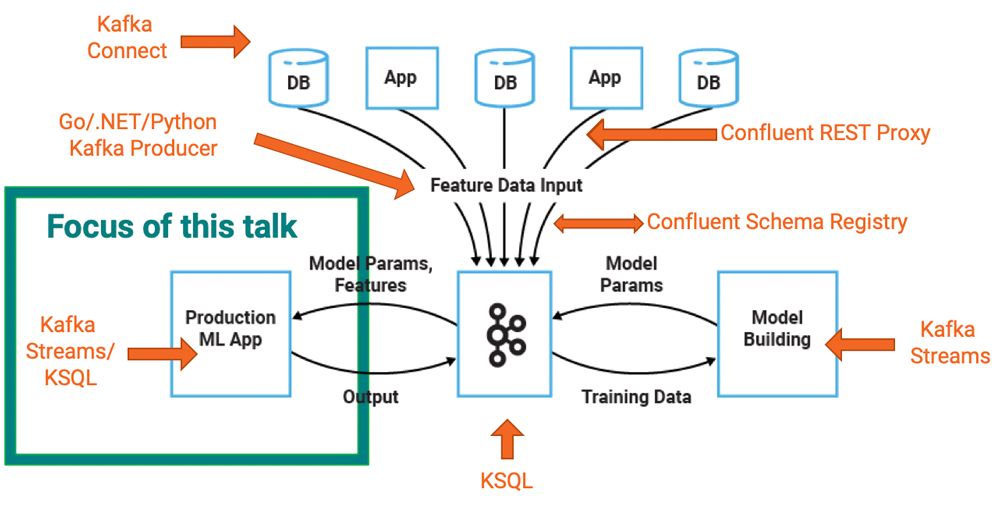

In [113]:
spark.readStream?

In [ ]:
# Extract (Извлечение) из kafka

from pyspark.sql.functions import from_json, from_kafka

# Настройка потребителя Kafka
df_kafka = spark.readStream \
    .format("kafka") \
    .option("kafka.bootstrap.servers", "localhost:9092") \
    .option("subscribe", "topic-name") \
    .load() \
    .select(from_kafka()) \
    .selectExpr("CAST(key AS STRING)", "CAST(value AS STRING)")

In [ ]:
# Extract (Извлечение) из кластера

from pyspark.sql import SparkSession

# Создание SparkSession
spark = SparkSession.builder \
    .appName("SparkOnDataSphere") \
    .config("spark.yarn.access.conf", "y4:0") \
    .getOrCreate()

# Подключение к уже существующему кластеру
spark = SparkSession.builder \
    .appName("SparkOnDataSphere") \
    .config("spark.master", "yarn") \
    .config("spark.executor.memory", "8g") \
    .config("spark.driver.memory", "4g") \
    .getOrCreate()

# Чтение данных из кластера
df = spark.read.format("org.apache.spark.sql.sources.v2.DataSourceV2") \
    .option("path", "/data/your_data_path") \
    .load()

# Использование DataFrame
df.show()